In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as pl
from sklearn.ensemble import IsolationForest

# importing data
#
data = np.load('data/KeplerSampleWErr.npy')
data_sparse = np.load('data/KeplerSampleWErrSparse.npy')

Populating the interactive namespace from numpy and matplotlib


In [50]:
# pre-process
#
print(data.shape)
print(data_sparse.shape)

data_train = data[:500]
data_test = data[500:]

print(data_train.shape)
print(data_test.shape)


(2500, 3, 100)
(2500, 3, 50)
(500, 3, 100)
(2000, 3, 100)


In [54]:
# build a simple model
#
rng = np.random.RandomState(42)

# fit the model
clf = IsolationForest(max_samples=500, contamination=0.01, random_state=rng)
clf.fit(data_train[:,1,:])
preds = clf.predict(data_test[:,1,:])
scores = clf.decision_function(data_test[:,1,:])

# for i in range(len(preds)):
#     print("{}, {}".format(preds[i], scores[i]))
    
outlier_idxs = [i for i, x in enumerate(preds) if x == -1]
print(len(outlier_idxs))

9


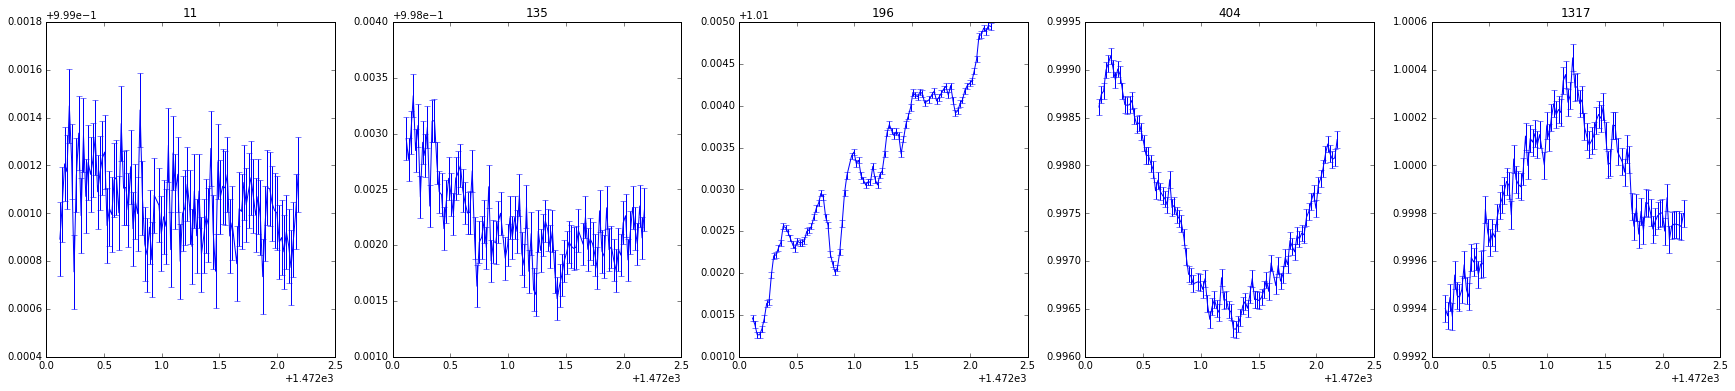

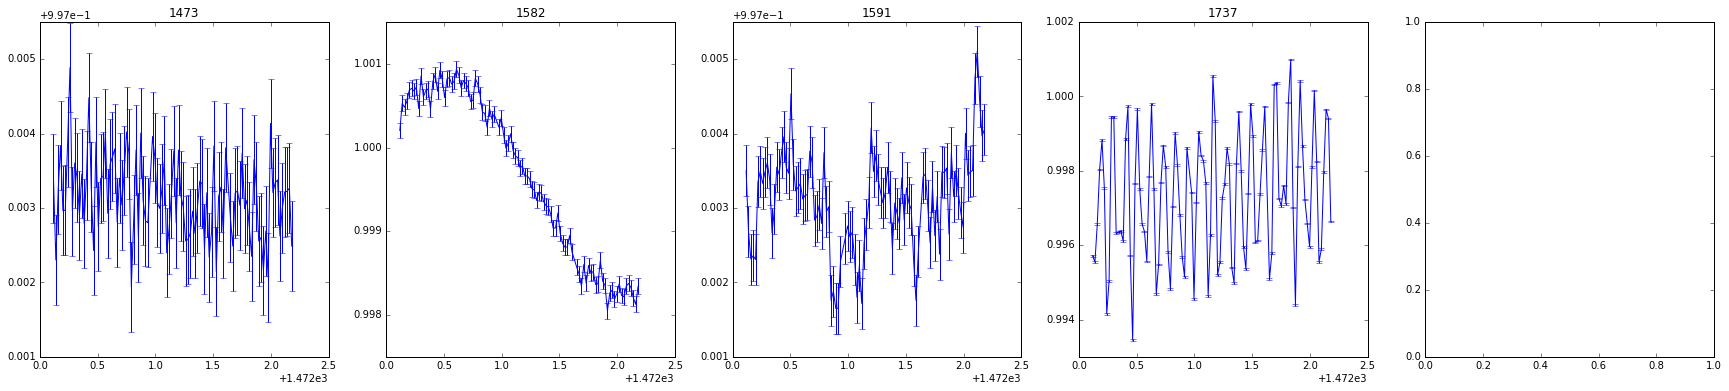

In [59]:
# visualizing the light curves
#
for (i, ex) in enumerate(outlier_idxs):

    if i % 5 == 0:
        f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(30, 6))
        ax0.errorbar(data[ex,0,:], data[ex,1,:], data[ex,2,:])
        ax0.set_title(ex)
        
    elif i % 5 == 1:
        ax1.errorbar(data[ex,0,:], data[ex,1,:], data[ex,2,:])
        ax1.set_title(ex)
    elif i % 5 == 2:
        ax2.errorbar(data[ex,0,:], data[ex,1,:], data[ex,2,:])
        ax2.set_title(ex)
    elif i % 5 == 3:
        ax3.errorbar(data[ex,0,:], data[ex,1,:], data[ex,2,:])
        ax3.set_title(ex)
    else:
        ax4.errorbar(data[ex,0,:], data[ex,1,:], data[ex,2,:])
        ax4.set_title(ex)
        pl.show()
    
# print(data_no_err[0,:])